## <center> KNN Classifier : K-nearest-neighbors </center>
It is one of the simplest algorithm to start with.
The classifier will look for its closest K-points. K defines the number of neighboring points used to make a decision. By default it uses 5 K points to make the decision.

It is simple but does not do so well with larger data sets thats have hundred of features, it becomes very slow.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

### Install scikit learn module
```
sudo pip3 install -U scikit-learn
```

### Install matplotlib module
```
sudo pip3 install -U matplotlib
```

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cancer = load_breast_cancer()

### Install mg-learn module
```
sudo pip3 install mglearn
```

In [6]:
import sys
print(sys.executable)

/usr/bin/python3


#### Install a pip package in the current Jupyter kernel

In [ ]:
import sys
!{sys.executable} -m pip install mglearn

- we need the mglearn package :  
  Helper functions for the book "Introduction to Machine Learning with Python"

#### Install a conda package in the current Jupyter kernel

```
import sys
!conda install --yes  some_conda_package
```

#### Illustrate KNN classifier with mg-learn module :
We use 3 neighbors just for the illustration.

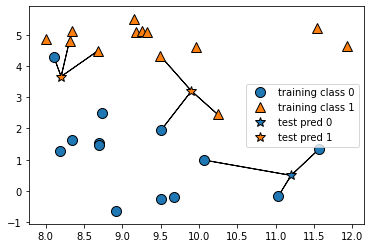

In [16]:
import warnings
warnings.filterwarnings('ignore')

import mglearn
from sklearn.datasets import make_blobs

mglearn.plots.plot_knn_classification(n_neighbors=3)

Let's assume :
   - The blue circles represent malignant tumors 
   - The orange triangles the benign ones
    
   (as learned by our KNN classifier.)  
   
   - Stars are new sample.  
    
When we ask KNN to make a prediction or a decision or a classification of this new data point   
it will decide on the average of these three neighbors.  


In [ ]:
print(cancer.target)

#### Construct and train the KNN model :

### Split the dataset

1. stratify :   
data is split in a stratified fashion, using cancer.target as the class labels.  
For example, if it is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones,   
stratify=target will make sure that your random split has 25% of 0's and 75% of 1's.  

2. random_state :   
controls the shuffling applied to the data before applying the split.

* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



weights{‘uniform’, ‘distance’, ‘callable’}, default=’uniform’

In [3]:
from sklearn.model_selection import train_test_split

# Fill here

knn.score :  
Mean accuracy of self.predict(X) /wrt y.

#### Let's evaluate the algorithm

In [3]:
# Fill here

Accuracy of KNN n-5, on the test set: 0.930  
This means that KNN algorithm is able to correctly classify 93% of the tests data.  
This is a good score, but can we work with the parameters to make it even better ?  

Let's focus on neighbors number.

Resplit the dataset :

In [ ]:
# Fill here

Test the model with 1 to 30 neighbors and compare :

In [6]:
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 30)

for n_neighbors in neighbors_settings:
    # Fill here

In [ ]:
# Display the results
plt.plot(neighbors_settings, training_accuracy, label='Accuracy on the training set')
plt.plot(neighbors_settings, test_accuracy, label='Accuracy on the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors')
plt.legend()

### The algorithm seems to work better with 6 neighbors

- By default, we took all the features from the dataset
- Which features are the most significant ?

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier()
n_feats = cancer.data.shape[1]
y =  cancer.target

sign_dict = {}

for i in range(n_feats):
    X = cancer.data[:, i].reshape(-1, 1)
    scores = cross_val_score(clf, X, y, cv=3)
    sign_dict[i]=scores.mean()
    sign_dict = {k: v for k, v in sorted(sign_dict.items(), key=lambda item: item[1],reverse=True)}

nd = []

for v in sign_dict:
    nd.append ([cancer.feature_names[v], sign_dict[v]])
    
pdf = pd.DataFrame(data=nd, columns=['Feature','Accuracy'])
pdf

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
from matplotlib.pyplot import figure
    
pdf = pdf.sort_values(by=['Accuracy'])

pdf.plot(kind='barh',x='Feature',y='Accuracy',orientation='horizontal')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(5, 10.5)
plt.show()

#### A way to improve the accuracy of the model :
We can imporove the model by selecting the features that are more relevant and to eliminate the ones that are less important.
For each change of the feature list, train the model and see how the score evoluate.